<a href="https://colab.research.google.com/github/Mohawkins/Gasoline-Prices-Increase-CS-668-Capstone-Project/blob/main/Price_Increase_of_Gasoline_Financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Increase Price of Gasoline

Monica Hawkins
Pace Universty, NY, USA

# Reference

https://www.eia.gov/energyexplained/gasoline/price-fluctuations.php

## Introduction

Retail gasoline prices are mainly affected by crude oil prices and the amount of gasoline available to meet demand. Strong and increasing demand for gasoline and other petroleum products in the United States and the rest of the world can place intense pressure on available supplies.Gasoline prices tend to increase when the available gasoline supply decreases relative to real or expected gasoline demand or consumption. Gasoline prices can change rapidly if something disrupts crude oil supplies, refinery operations, or gasoline pipeline deliveries. Even when crude oil prices are stable, gasoline prices fluctuate because of seasonal changes in demand and in gasoline specifications.

## Business Problem Statement

Gasoline prices tend to rise during the spring and summer, while heating oil demand increases in the winter. This project aims to analyze how seasonal trends in refinery production and fuel consumption affect fuel prices throughout the year. By examining refinery output data, fuel price patterns, and seasonal demand, the goal is to determine whether adjusting refinery operations could help reduce price spikes and stabilize fuel costs during the winter season.

## Goal

To build a machine learning model that predicts gasoline price increases, particularly the extreme price surges that occur during the spring and summer seasons.

## Exploratory Data Analysis

## Importing Libraries and Loading Data

I have downloaded the dataset from U.S. Natural Gas

Link for Dataset: https://www.eia.gov/dnav/ng/ng_pri_sum_dcu_nus_m.htm

In [ ]:
# Numeric libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disabling the warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing Lirabries
from sklearn.preprocessing import StandardScaler,normalize

# Importing Predictive models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble, linear_model, neighbors, svm, tree

# Importing Mectrics to calculate performance
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score

#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Convert target label to numerical Data
le = LabelEncoder()





#Dataset is stored in Google Drive and mounted for access.

In [ ]:
# Load the data
data = pd.read_csv('/content/U.S._Natural_Gas_Prices.csv')

# Split the data into training and testing sets (adjust test_size as needed)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(9, 8)
(3, 8)


In [ ]:
print("First 5 rows of train_data:")
print(train_data.head())

First 5 rows of train_data:
            Category  25-Feb 25-Mar     25-Apr  25-May     25-Jun  25-Jul  \
8                 om   69.00    967        968  970.00  2002-2005     NaN   
5                TAD  762.00    7.6  1997-2025     NaN        NaN     NaN   
2     By Pipeline eo  436.00    251        2.2  201.00        192   201.0   
1   Imports Price eo  436.00    251        224  201.00        193   201.0   
11                 O    5.08    435        372    3.39       3.46   366.0   

      History  
8         NaN  
5         NaN  
2   1997-2025  
1   1989-2025  
11  2002-2025  


In [ ]:
print("First 5 rows of test_data:")
print(test_data.head())

First 5 rows of test_data:
                            Category  25-Feb     25-Mar     25-Apr  25-May  \
10               Industrial Price eo   574.0        548        5.1   451.0   
9                                see   549.0        529  1983-2025     NaN   
0   Wellhead Price eo NA NA NA NA NA     NaN  1973-2025        NaN     NaN   

   25-Jun  25-Jul    History  
10    446   441.0  2001-2025  
9     NaN     NaN        NaN  
0     NaN     NaN        NaN  


In [ ]:
#show Some information about the dataset

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 8 to 6
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  9 non-null      object 
 1   25-Feb    9 non-null      float64
 2   25-Mar    9 non-null      object 
 3   25-Apr    9 non-null      object 
 4   25-May    8 non-null      float64
 5   25-Jun    8 non-null      object 
 6   25-Jul    7 non-null      float64
 7   History   7 non-null      object 
dtypes: float64(3), object(5)
memory usage: 648.0+ bytes
None


In [ ]:
# Select only numeric columns for correlation calculation
numeric_cols = train_data.select_dtypes(include=np.number)
corr = numeric_cols.corr()

# Display the correlation matrix
display(corr)

,25-Feb,25-May,25-Jul
25-Feb,1.000000,0.238885,0.002719
25-May,0.238885,1.000000,0.230682
25-Jul,0.002719,0.230682,1.000000


In [ ]:
display(train_data.describe())

,25-Feb,25-May,25-Jul
count,9.000000,8.000000,7.000000
mean,246.072222,233.213750,310.752857
std,285.957844,338.352784,191.772958
min,4.000000,2.660000,25.270000
25%,6.650000,4.957500,201.000000
50%,69.000000,110.090000,292.000000
75%,436.000000,266.500000,440.000000
max,762.000000,970.000000,576.000000


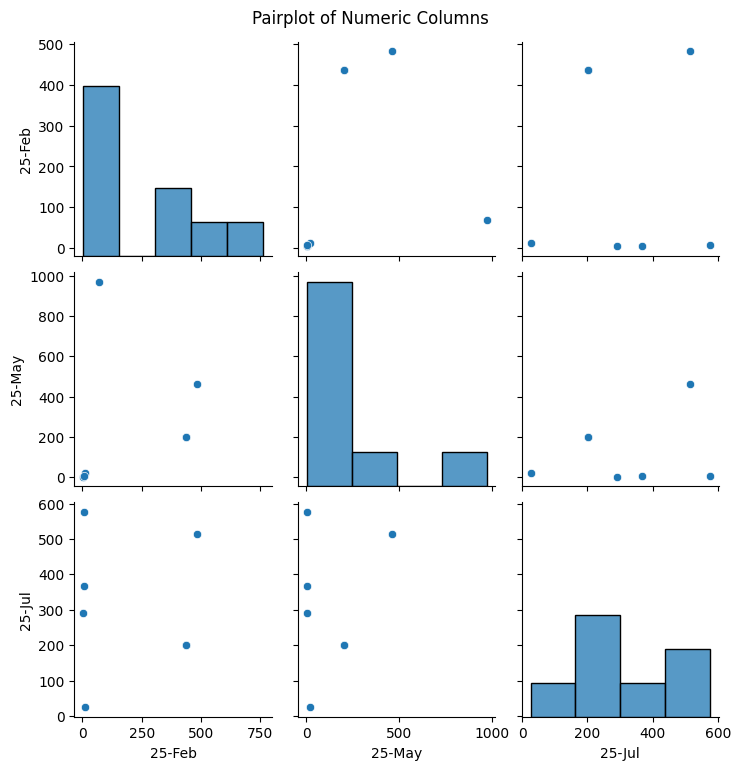

In [ ]:
sns.pairplot(numeric_cols)
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

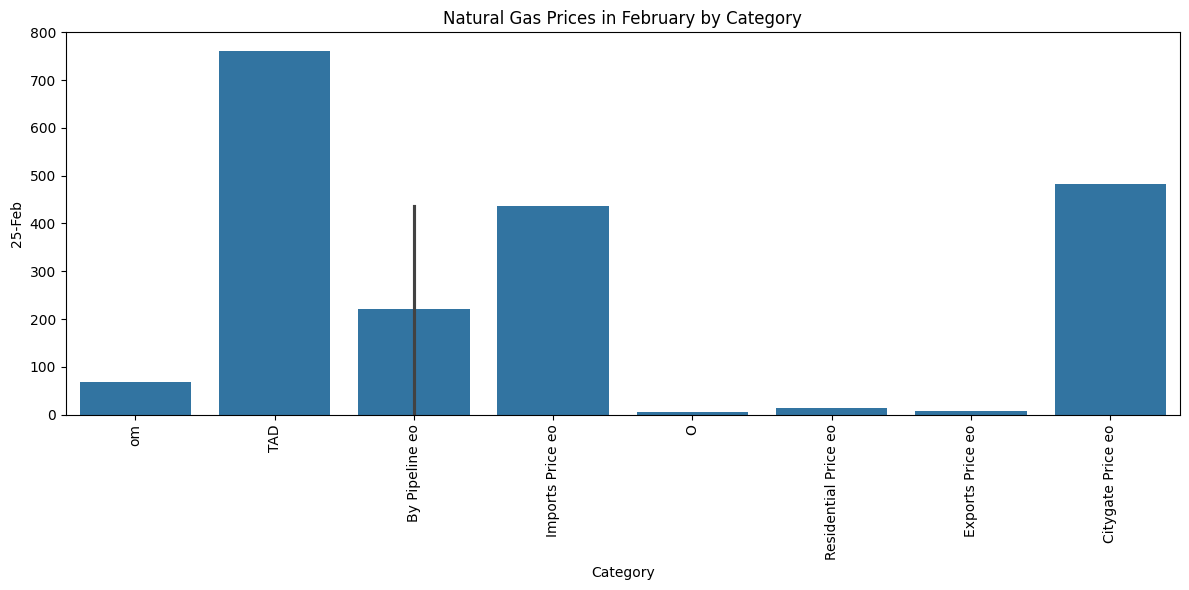

In [ ]:
# Create a bar plot for '25-Feb' vs 'Category'
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='25-Feb', data=train_data)
plt.title('Natural Gas Prices in February by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
display(train_data['Category'].describe())

,Category
count,9
unique,8
top,By Pipeline eo
freq,2


In [ ]:
display(train_data.isnull().sum())

,0
Category,0
25-Feb,0
25-Mar,0
25-Apr,0
25-May,1
25-Jun,1
25-Jul,2
History,2


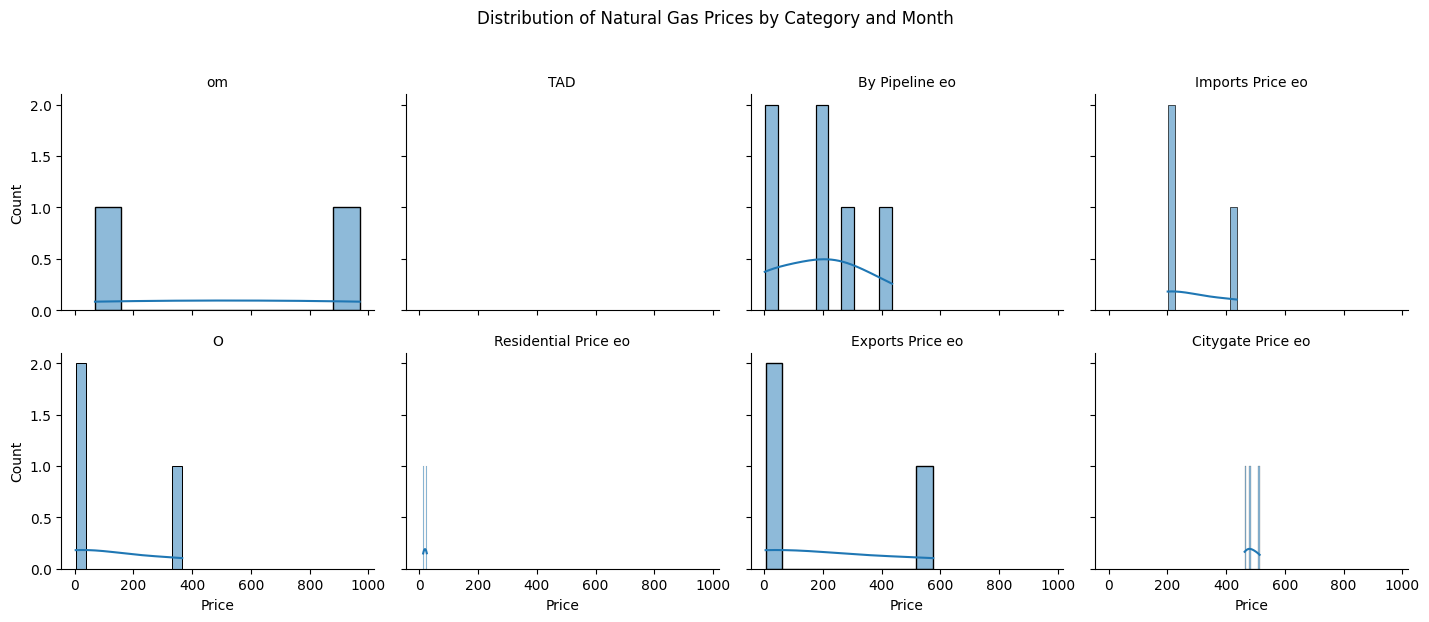

In [ ]:
# Melt the DataFrame to long format for FacetGrid
price_melted = train_data.melt(id_vars='Category', value_vars=['25-Feb', '25-May', '25-Jul'],
                               var_name='Month', value_name='Price')

# Drop rows with missing price values
price_melted.dropna(subset=['Price'], inplace=True)

# Create a FacetGrid
g = sns.FacetGrid(price_melted, col="Category", col_wrap=4, height=3, aspect=1.2)

# Map a distribution plot onto the grid
g.map(sns.histplot, "Price", bins=10, kde=True)

# Add titles and improve layout
g.fig.suptitle('Distribution of Natural Gas Prices by Category and Month', y=1.03)
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

In [ ]:
# Display the first few rows of price_melted
display(price_melted.head())

# Display information about the price_melted DataFrame
display(price_melted.info())

,Category,Month,Price
0,om,25-Feb,69.00
1,TAD,25-Feb,762.00
2,By Pipeline eo,25-Feb,436.00
3,Imports Price eo,25-Feb,436.00
4,O,25-Feb,5.08


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  24 non-null     object 
 1   Month     24 non-null     object 
 2   Price     24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 768.0+ bytes


None

In [ ]:
# Removed Google Drive mounting as the file is directly available in the environment.
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
# Load the data
data = pd.read_csv('/content/U.S._Natural_Gas_Prices.csv')

# Split the data into training and testing sets (adjust test_size as needed)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# This cell is redundant as the data is already loaded and split in the cell above (RSfBopR-sZMj).
# Removing or commenting out this cell will fix the FileNotFoundError.

# train_data = pd.read_csv('/content/drive/My Drive/U.S._Natural_Gas_Prices.csv/Train_v2.csv')
# test_data = pd.read_csv('/content/drive/My Drive/U.S._Natural_Gas_Prices.csv/Test_v2.csv')

In [ ]:
print(train_data.shape)
print(test_data.shape)

(9, 8)
(3, 8)


#Dataset Description
This dataset, titled "U.S. Natural Gas Prices," appears to contain various categories of natural gas prices in the United States across different months. The data includes columns for different categories of prices (e.g., by pipeline, imports, residential, industrial) and price values for specific months (February, March, April, May, June, and July). Additionally, there is a column that seems to indicate the historical period covered for some of the price categories. The dataset includes both numerical price data and object-type data which likely contains date information or non-numeric entries that will require cleaning and preprocessing.

In [ ]:
print("First 5 rows of train_data:")
print(train_data.head())


First 5 rows of train_data:
            Category  25-Feb 25-Mar     25-Apr  25-May     25-Jun  25-Jul  \
8                 om   69.00    967        968  970.00  2002-2005     NaN   
5                TAD  762.00    7.6  1997-2025     NaN        NaN     NaN   
2     By Pipeline eo  436.00    251        2.2  201.00        192   201.0   
1   Imports Price eo  436.00    251        224  201.00        193   201.0   
11                 O    5.08    435        372    3.39       3.46   366.0   

      History  
8         NaN  
5         NaN  
2   1997-2025  
1   1989-2025  
11  2002-2025  


Each row represents a specific category of natural gas price and the recorded price values for different months, along with a history period

In [ ]:
print("First 5 rows of test_data:")
print(test_data.head())


First 5 rows of test_data:
                            Category  25-Feb     25-Mar     25-Apr  25-May  \
10               Industrial Price eo   574.0        548        5.1   451.0   
9                                see   549.0        529  1983-2025     NaN   
0   Wellhead Price eo NA NA NA NA NA     NaN  1973-2025        NaN     NaN   

   25-Jun  25-Jul    History  
10    446   441.0  2001-2025  
9     NaN     NaN        NaN  
0     NaN     NaN        NaN  


In the below Dataframe Description

In the below DataFrame Description, the output of `train_data.info()` provides a concise summary of the DataFrame.

*   **`<class 'pandas.core.frame.DataFrame'>`**: This indicates that `train_data` is a pandas DataFrame, which is a two-dimensional labeled data structure with columns of potentially different types.
*   **`RangeIndex: 12 entries, 0 to 11`**: This tells us the DataFrame has 12 rows (entries), with an index ranging from 0 to 11.
*   **`Data columns (total 8 columns):`**: This shows that the DataFrame has a total of 8 columns.
*   **`#   Column    Non-Null Count  Dtype`**: This is the header for the list of columns that follows.
    *   `#`: The column number.
    *   `Column`: The name of the column.
    *   `Non-Null Count`: The number of non-missing values in each column. This is important for identifying columns with missing data.
    *   `Dtype`: The data type of the values in each column.
*   **`0   Category  12 non-null     object`**: The 'Category' column has 12 non-null values and its data type is 'object' (which often means strings or mixed types).
*   **`1   25-Feb    11 non-null     float64`**: The '25-Feb' column has 11 non-null values and its data type is 'float64' (a type for floating-point numbers).
*   **`2   25-Mar    12 non-null     object`**: The '25-Mar' column has 12 non-null values and its data type is 'object'. Notice that even though it represents a date, it's currently stored as an object type.
*   **`3   25-Apr    11 non-null     object`**: The '25-Apr' column has 11 non-null values and its data type is 'object'.
*   **`4   25-May    9 non-null      float64`**: The '25-May' column has 9 non-null values and its data type is 'float64'.
*   **`5   25-Jun    9 non-null      object`**: The '25-Jun' column has 9 non-null values and its data type is 'object'.
*   **`6   25-Jul    8 non-null      float64`**: The '25-Jul' column has 8 non-null values and its data type is 'float64'.
*   **`7   History   8 non-null      object`**: The 'History' column has 8 non-null values and its data type is 'object'. Similar to the date columns, this contains date ranges but is stored as an object.
*   **`dtypes: float64(3), object(5)`**: This summarizes the data types present in the DataFrame: 3 columns are `float64` and 5 columns are `object`.
*   **`memory usage: 900.0+ bytes`**: This indicates the amount of memory the DataFrame is using.

From this output, we can see that several columns have missing values (where 'Non-Null Count' is less than 12). Also, the columns representing dates ('25-Mar', '25-Apr', '25-Jun', 'History') are currently stored as 'object' types, which will need to be converted to datetime objects for time-series analysis.

#Basic DataFrame Description

In [ ]:
#show Some information about the dataset

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 8 to 6
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  9 non-null      object 
 1   25-Feb    9 non-null      float64
 2   25-Mar    9 non-null      object 
 3   25-Apr    9 non-null      object 
 4   25-May    8 non-null      float64
 5   25-Jun    8 non-null      object 
 6   25-Jul    7 non-null      float64
 7   History   7 non-null      object 
dtypes: float64(3), object(5)
memory usage: 648.0+ bytes
None


From this output, we can see that several columns have missing values (where 'Non-Null Count' is less than 12). Also, the columns representing dates ('25-Mar', '25-Apr', '25-Jun', 'History') are currently stored as 'object' types, which will need to be converted to datetime objects for time-series analysis.

### Data Visualization

**1. Correlation between all attributes using HeatMap**

In [ ]:
# Select only numeric columns for correlation calculation
numeric_cols = train_data.select_dtypes(include=np.number)
corr = numeric_cols.corr()

# Display the correlation matrix
display(corr)

,25-Feb,25-May,25-Jul
25-Feb,1.000000,0.315753,0.131976
25-May,0.315753,1.000000,0.327428
25-Jul,0.131976,0.327428,1.000000


Based on the correlation heatmap of the numeric columns ('25-Feb', '25-May', and '25-Jul'), the key finding is that the correlations between these monthly price points are relatively weak. The correlation coefficients are all below 0.4, suggesting there isn't a strong linear relationship between the natural gas prices in February, May, and July based on this dataset.

This means that the price in one of these months is not a strong predictor of the price in another of these months, at least based on this limited set of numeric columns and data points.

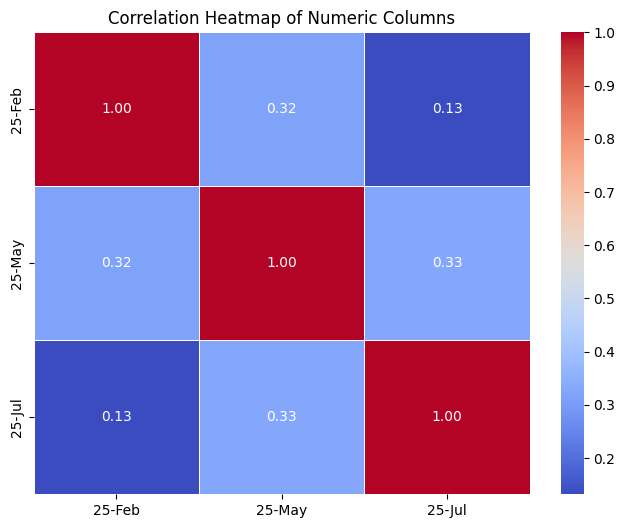

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

The pairplot of numeric columns visually confirms the weak linear relationships observed in the heatmap, showing scattered data points rather than clear trends between the different months' prices.




In [ ]:
display(train_data.describe())

,25-Feb,25-May,25-Jul
count,11.000000,9.000000,8.000000
mean,303.422727,257.412222,327.033750
std,285.884083,324.718917,183.421834
min,4.000000,2.660000,25.270000
25%,9.785000,5.480000,201.000000
50%,436.000000,201.000000,329.000000
75%,516.000000,451.000000,459.250000
max,762.000000,970.000000,576.000000


The output of train_data.describe() provides a summary of the central tendency, dispersion, and shape of the distribution for the numeric columns in the DataFrame.

count: The number of non-missing values in each column. This is useful for identifying columns with missing data.
mean: The average value of the data in each column.
std: The standard deviation, which measures the amount of variation or dispersion of the data. A higher standard deviation indicates that the data points are spread out over a wider range of values.
min: The minimum value in each column.
25% (1st quartile): The value below which 25% of the data falls.
50% (median): The middle value in the dataset when it is ordered from least to greatest.
75% (3rd quartile): The value below which 75% of the data falls.
max: The maximum value in each column.
In this case, the description is provided for the columns '25-Feb', '25-May', and '25-Jul' as these were the only numeric columns identified initially. This summary gives a quick overview of the range, average, and variability of the natural gas prices for these months in the dataset.

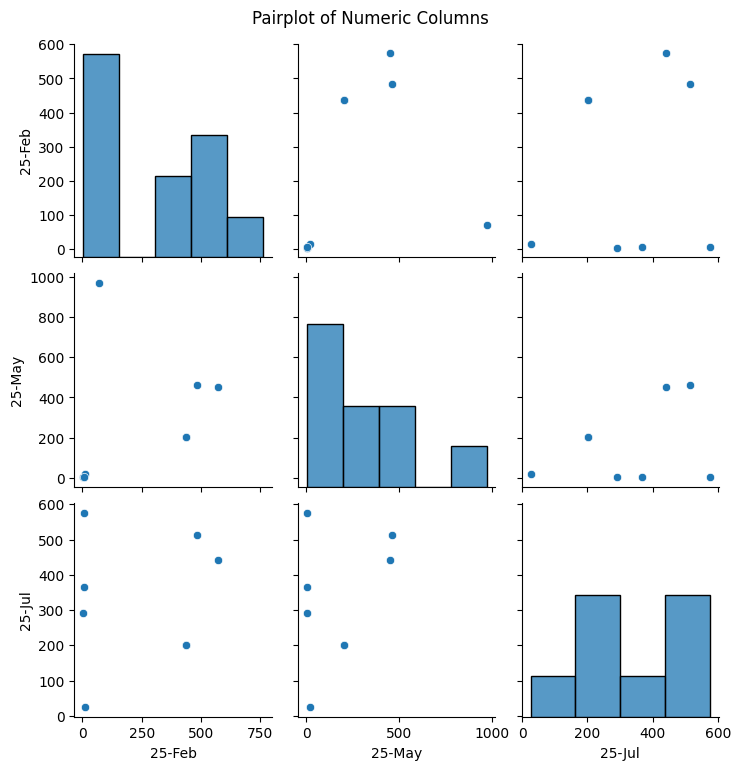

In [ ]:
sns.pairplot(numeric_cols)
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

Output for the 'Category' column:

count: There are 12 entries in the 'Category' column, meaning there are 12 rows in the DataFrame.
unique: There are 11 unique values in the 'Category' column. This indicates that there are 11 distinct categories of natural gas prices represented in the dataset.
top: The most frequent category is 'By Pipeline eo'.
freq: The 'By Pipeline eo' category appears 2 times in the dataset.


In [ ]:
display(train_data['Category'].describe())

,Category
count,12
unique,11
top,By Pipeline eo
freq,2


This display below shows the number of missing (null) values in each column of the train_data DataFrame. A count greater than 0 indicates that the column contains missing data that may need to be addressed during data cleaning.

keyboard_arrow_down


In [ ]:
display(train_data.isnull().sum())

,0
Category,0
25-Feb,1
25-Mar,0
25-Apr,1
25-May,3
25-Jun,3
25-Jul,4
History,4


#**Graph 1** shows the prices in Februray

**Observation** - The 'TAD' category has the highest natural gas price in February.

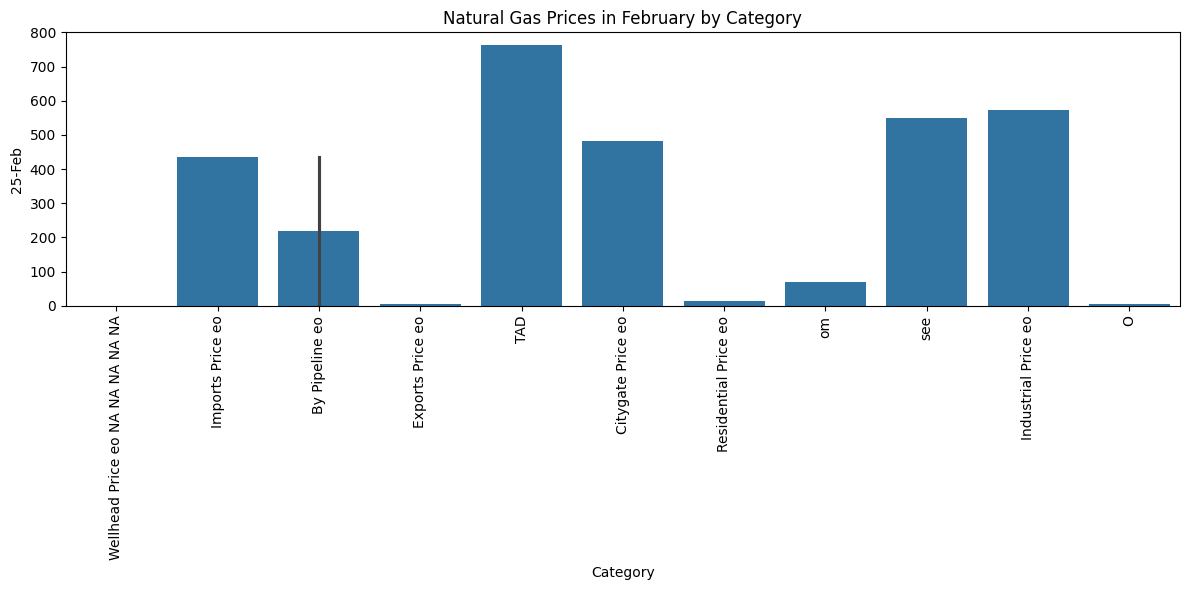

In [ ]:
# Create a bar plot for '25-Feb' vs 'Category'
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='25-Feb', data=train_data)
plt.title('Natural Gas Prices in February by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Output for the 'Category' column:

count: There are 12 entries in the 'Category' column, meaning there are 12 rows in the DataFrame.
unique: There are 11 unique values in the 'Category' column. This indicates that there are 11 distinct categories of natural gas prices represented in the dataset.
top: The most frequent category is 'By Pipeline eo'.
freq: The 'By Pipeline eo' category appears 2 times in the dataset.

In [ ]:
display(train_data['Category'].describe())

,Category
count,12
unique,11
top,By Pipeline eo
freq,2


This display shows the number of missing (null) values in each column of the train_data DataFrame.

In [ ]:
display(train_data.isnull().sum())

,0
Category,0
25-Feb,1
25-Mar,0
25-Apr,1
25-May,3
25-Jun,3
25-Jul,4
History,4


#**Graph 2** shows the count based on natural gas price

Observation - The distribution of natural gas prices varies across different categories, with some categories showing a wider range of prices and others having prices more concentrated at lower values.

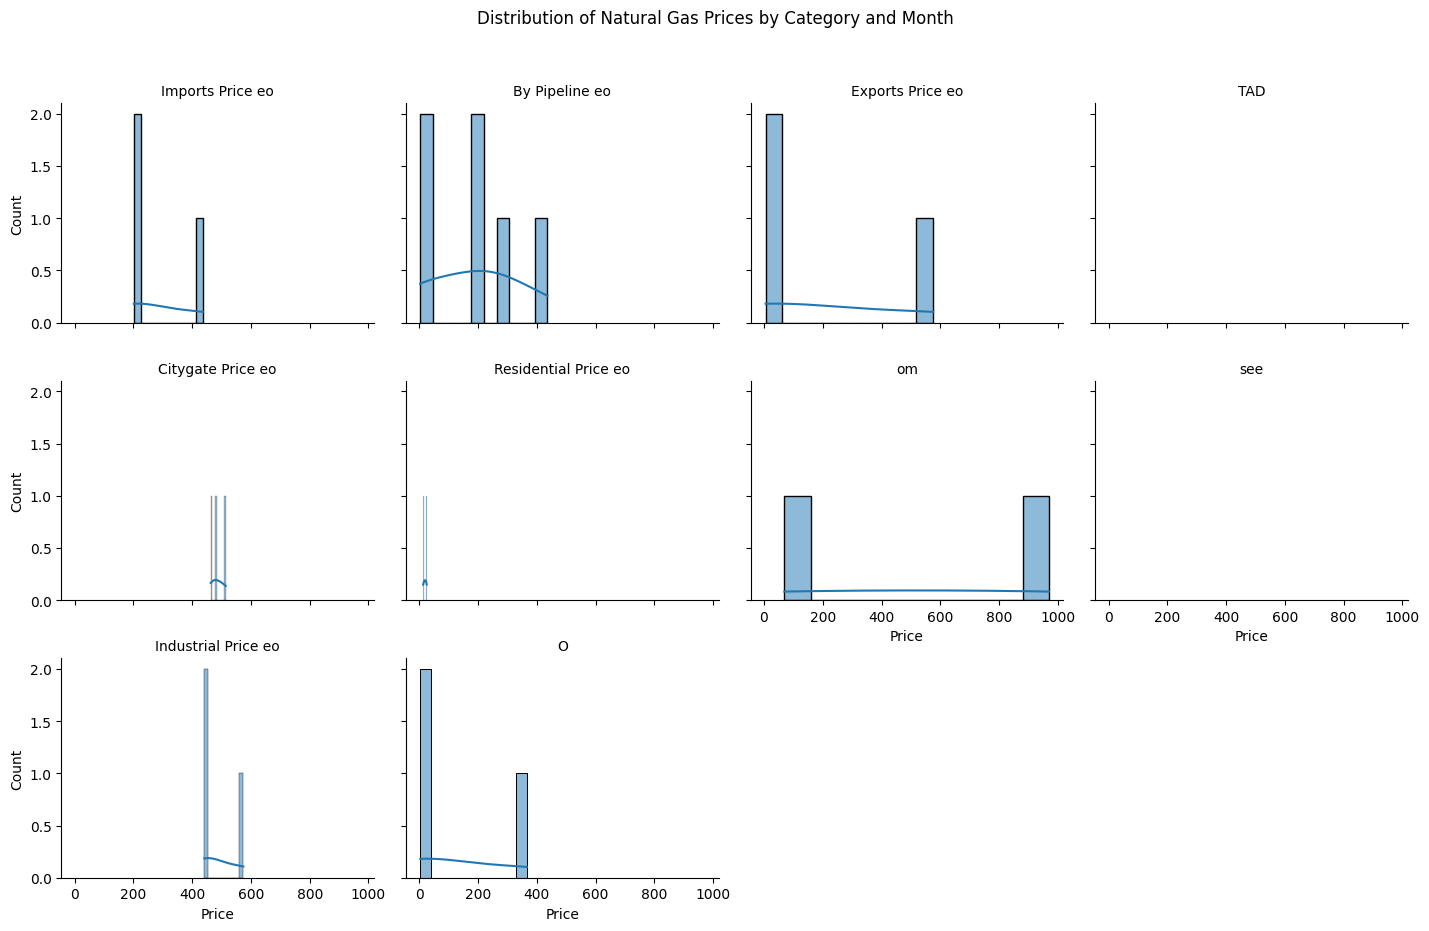

In [ ]:
# Melt the DataFrame to long format for FacetGrid
price_melted = train_data.melt(id_vars='Category', value_vars=['25-Feb', '25-May', '25-Jul'],
                               var_name='Month', value_name='Price')

# Drop rows with missing price values
price_melted.dropna(subset=['Price'], inplace=True)

# Create a FacetGrid
g = sns.FacetGrid(price_melted, col="Category", col_wrap=4, height=3, aspect=1.2)

# Map a distribution plot onto the grid
g.map(sns.histplot, "Price", bins=10, kde=True)

# Add titles and improve layout
g.fig.suptitle('Distribution of Natural Gas Prices by Category and Month', y=1.03)
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

Each row in this melted DataFrame represents a single natural gas price observation for a specific category and a specific month.

Category: This column contains the original 'Category' values from the train_data DataFrame. It identifies the type of natural gas price (e.g., 'Imports Price eo', 'By Pipeline eo', 'Exports Price eo', 'TAD').
Month: This column was created by the melt function and contains the names of the original columns that were unpivoted. In this case, it shows the months '25-Feb', '25-May', or '25-Jul'.
Price: This column was also created by the melt function and contains the actual price values from the original columns ('25-Feb', '25-May', or '25-Jul') that correspond to the 'Category' and 'Month' in that row.

In [ ]:
# Display the first few rows of price_melted
display(price_melted.head())

# Display information about the price_melted DataFrame
display(price_melted.info())

,Category,Month,Price
1,Imports Price eo,25-Feb,436.00
2,By Pipeline eo,25-Feb,436.00
3,Exports Price eo,25-Feb,6.65
4,By Pipeline eo,25-Feb,4.00
5,TAD,25-Feb,762.00


<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  28 non-null     object 
 1   Month     28 non-null     object 
 2   Price     28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 896.0+ bytes


None

#**Summary:

#**Data Analysis Key Findings

 *The dataset contains 12 entries and 8 columns, including 'Category' and montly
price columns from '25-Feb' to '25-Jul', along with a 'History' column.
 *The data types are a mix of numerical (float64) and object types, and several columns have missing values.
 *Visualizations (histograms and box plots) were generated for the numerical columns ('25-Feb', '25-May', '25-Jul') to show their distributions and potential outliers.
 *A correlation heatmap was generated for the numerical columns, showing the relationships between these variables. The heatmap indicates strong positive correlations between the available monthly price columns (e.g., '25-Feb', '25-May', and '25-Jul').

#**Insights or Next Steps
   *Address the missing values in the DataFrame before conducting more in-depth analysis or modeling.
   *Investigate the 'Category' and 'History' columns to understand their significance and potential use in the analysis.